In [1]:
import numpy as np
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from qp_solver import *

#### Solve problems:
 - For a noise amplitude, generate 10 random perturbations of the same problem
 - Solve the 10 problems in succession, using the previous solution as a warm starting point
 - Record normalized cost, normalized constraint_sat
 - Repeat for 3 noise amplitudes in total

In [5]:
problem_files = get_complete_filenames_with_path()
num_iter = 300
prob_num_init = 49
prob_num_end = 50
prob_num_step = 1
num_prob = np.ceil((prob_num_end - prob_num_init) / prob_num_step).astype(int)
perturb_settings_list = [PerturbationSettings(do_perturb=True, noise_ampl=eta) for eta in [0.0, 0.01, 0.075]]
num_perturb = len(perturb_settings_list)
num_rand_perturbs = 10

costs = np.zeros((num_iter // 2 - 1, num_prob, num_rand_perturbs, num_perturb))
constraint_sats = np.zeros((num_iter // 2 - 1, num_prob, num_rand_perturbs, num_perturb))
final_solutions = []
final_aux_solns = []
osqp_costs = np.zeros((num_prob, num_rand_perturbs, num_perturb))
final_state_x_norms = np.zeros((num_prob, num_rand_perturbs, num_perturb))

for pf_idx, pf in enumerate(problem_files[prob_num_init:prob_num_end:prob_num_step]):
    fin_solus = []
    fin_auxes = []
    for ptbid, perset in enumerate(perturb_settings_list):
        qpp_list = [QPProblemNumPy(pf, perturb_settings=perset) for _ in range(num_rand_perturbs)]
        f_sols = []
        f_auxs = []
        for inst_idx, qpp in enumerate(qpp_list):
            print(qpp.problem_file.split('/')[-1], end=" ", flush=True)
            print(qpp.perturb_settings.noise_ampl, flush=True)
            initstatex = f_sols[-1] if len(f_sols) >= 1 else None
            initstatew = f_auxs[-1] if len(f_auxs) >= 1 else None
            qpsolver = QPSolverNumPy(qpp=qpp, 
                                     num_iter=num_iter, 
                                     init_state_x=initstatex,
                                     init_state_w=initstatew)
            qpsolver.solve()

            # Catalogue costs and constraint satisfaction
            costs[:, pf_idx, inst_idx, ptbid] = np.array(qpsolver.cost)
            constraint_sats[:, pf_idx, inst_idx, ptbid] = np.array(qpsolver.constraint_sat)
            f_sols.append(qpsolver.state_var_x_py)
            f_auxs.append(qpsolver.state_var_w_py)
            final_state_x_norms[pf_idx, inst_idx, ptbid] = np.linalg.norm(qpsolver.state_var_x_py)
            
            qpsolver.osqp_solve(initstatex=initstatex, initstatew=initstatew)
            osqp_costs[pf_idx, inst_idx, ptbid] = qpsolver.osqp_res.info.obj_val
        fin_solus.append(f_sols)
        fin_auxes.append(f_auxs)
    final_solutions.append(fin_solus)
    final_aux_solns.append(fin_auxes)

mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.0
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.01
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_240_2000.npz 0.075
Solving.. Done
mpc_

In [54]:
final_state_x_norms[:, 0, 2]

array([706.87764146])

In [34]:
normalized_cost.shape

(149, 10)

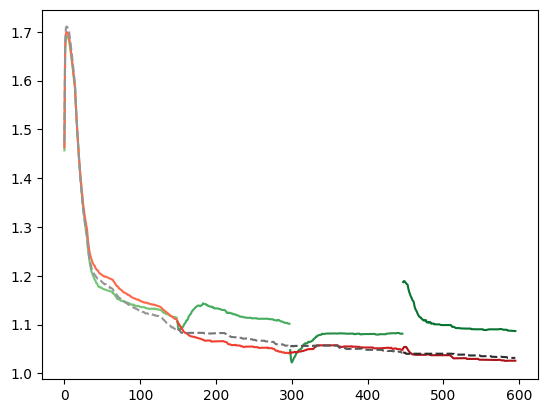

In [52]:
# rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))
fig, ax = plt.subplots()
cmap = plt.cm.Greens
ax.set_prop_cycle(color=cmap(np.linspace(0.5, 0.85, 4)))
ax.plot(np.arange(149), costs[:, 0, :1, 2].reshape(149, 1)/osqp_costs[:, 0, 2])
ax.plot(np.arange(149, 298), costs[:, 0, 1:2, 2].reshape(149, 1)/osqp_costs[:, 1, 2])
ax.plot(np.arange(298, 447), costs[:, 0, 2:3, 2].reshape(149, 1)/osqp_costs[:, 2, 2])
ax.plot(np.arange(447, 596), costs[:, 0, 3:4, 2].reshape(149, 1)/osqp_costs[:, 3, 2])
cmap = plt.cm.Reds
ax.set_prop_cycle(color=cmap(np.linspace(0.5, 0.85, 4)))
ax.plot(np.arange(149), costs[:, 0, :1, 1].reshape(149, 1)/osqp_costs[:, 0, 1])
ax.plot(np.arange(149, 298), costs[:, 0, 1:2, 1].reshape(149, 1)/osqp_costs[:, 1, 1])
ax.plot(np.arange(298, 447), costs[:, 0, 2:3, 1].reshape(149, 1)/osqp_costs[:, 2, 1])
ax.plot(np.arange(447, 596), costs[:, 0, 3:4, 1].reshape(149, 1)/osqp_costs[:, 3, 1])
cmap = plt.cm.Greys
ax.set_prop_cycle(color=cmap(np.linspace(0.5, 0.85, 4)))
ax.plot(np.arange(149), costs[:, 0, :1, 0].reshape(149, 1)/osqp_costs[:, 0, 0], '--')
ax.plot(np.arange(149, 298), costs[:, 0, 1:2, 0].reshape(149, 1)/osqp_costs[:, 1, 0], '--')
ax.plot(np.arange(298, 447), costs[:, 0, 2:3, 0].reshape(149, 1)/osqp_costs[:, 2, 0], '--')
ax.plot(np.arange(447, 596), costs[:, 0, 3:4, 0].reshape(149, 1)/osqp_costs[:, 3, 0], '--')
plt.show()

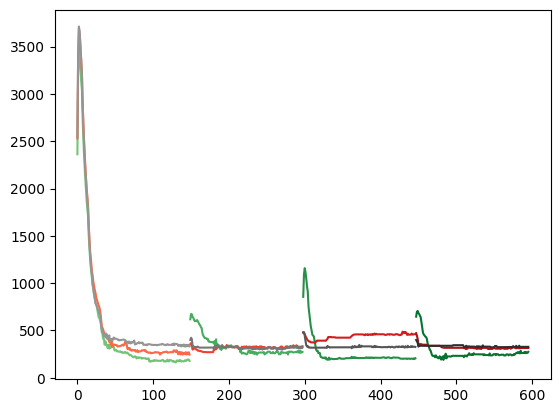

In [56]:
# rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 10)))
fig, ax = plt.subplots()
cmap = plt.cm.Greens
ax.set_prop_cycle(color=cmap(np.linspace(0.5, 0.85, 4)))
ax.plot(np.arange(149), constraint_sats[:, 0, :1, 2].reshape(149, 1))  # /final_state_x_norms[:, 0, 2])
ax.plot(np.arange(149, 298), constraint_sats[:, 0, 1:2, 2].reshape(149, 1))  # /final_state_x_norms[:, 1, 2])
ax.plot(np.arange(298, 447), constraint_sats[:, 0, 2:3, 2].reshape(149, 1))  # /final_state_x_norms[:, 2, 2])
ax.plot(np.arange(447, 596), constraint_sats[:, 0, 3:4, 2].reshape(149, 1))  # /final_state_x_norms[:, 3, 2])
cmap = plt.cm.Reds
ax.set_prop_cycle(color=cmap(np.linspace(0.5, 0.85, 4)))
ax.plot(np.arange(149), constraint_sats[:, 0, :1, 1].reshape(149, 1))  # /final_state_x_norms[:, 0, 1])
ax.plot(np.arange(149, 298), constraint_sats[:, 0, 1:2, 1].reshape(149, 1))  # /final_state_x_norms[:, 1, 1])
ax.plot(np.arange(298, 447), constraint_sats[:, 0, 2:3, 1].reshape(149, 1))  # /final_state_x_norms[:, 2, 1])
ax.plot(np.arange(447, 596), constraint_sats[:, 0, 3:4, 1].reshape(149, 1))  # /final_state_x_norms[:, 3, 1])
cmap = plt.cm.Greys
ax.set_prop_cycle(color=cmap(np.linspace(0.5, 0.85, 4)))
ax.plot(np.arange(149), constraint_sats[:, 0, :1, 0].reshape(149, 1))  # /final_state_x_norms[:, 0, 0], '--')
ax.plot(np.arange(149, 298), constraint_sats[:, 0, 1:2, 0].reshape(149, 1))  # /final_state_x_norms[:, 1, 0], '--')
ax.plot(np.arange(298, 447), constraint_sats[:, 0, 2:3, 0].reshape(149, 1))  # /final_state_x_norms[:, 2, 0], '--')
ax.plot(np.arange(447, 596), constraint_sats[:, 0, 3:4, 0].reshape(149, 1))  # /final_state_x_norms[:, 3, 0], '--')
plt.show()

In [3]:
normalized_costs = costs/osqp_costs
normalized_constraint_sats = constraint_sats/final_state_x_norms

In [2]:
matrices = np.load("/home/sumedhrr/neurips23-qp/NeuRIPS_data/anymal_quadruped/all_costs_constsat_sol_ni300_nonoise.npz")
costs, constraint_sats, final_state_x_norms, normalized_costs, normalized_constraint_sats = \
[matrices[i] for i in matrices]

In [42]:
mean_costs = []
max_costs = []
min_costs = []
std_costs = []
mean_csats = []
max_csats = []
min_csats = []
std_csats = []
for j in range(5):
    mean_costs.append(np.mean(costs[:, j*10:(j+1)*10], axis=1))
    max_costs.append(np.max(costs[:, j*10:(j+1)*10], axis=1))
    min_costs.append(np.min(costs[:, j*10:(j+1)*10], axis=1))
    std_costs.append(np.std(costs[:, j*10:(j+1)*10], axis=1))
    mean_csats.append(np.mean(constraint_sats[:, j*10:(j+1)*10], axis=1))
    max_csats.append(np.max(constraint_sats[:, j*10:(j+1)*10], axis=1))
    min_csats.append(np.min(constraint_sats[:, j*10:(j+1)*10], axis=1))
    std_csats.append(np.std(constraint_sats[:, j*10:(j+1)*10], axis=1))

In [43]:
mean_costs = np.array(mean_costs).T
min_costs = np.array(min_costs).T
max_costs = np.array(max_costs).T
std_costs = np.array(std_costs).T
mean_csats = np.array(mean_csats).T
min_csats = np.array(min_csats).T
max_csats = np.array(max_csats).T
std_csats = np.array(std_csats).T

In [28]:
mean_osqp_costs = []
max_osqp_costs = []
min_osqp_costs = []
for j in range(5):
    mean_osqp_costs.append(np.mean(osqp_costs[j*10:(j+1)*10]))
    min_osqp_costs.append(np.min(osqp_costs[j*10:(j+1)*10]))
    max_osqp_costs.append(np.max(osqp_costs[j*10:(j+1)*10]))
mean_osqp_costs = np.array(mean_osqp_costs)
min_osqp_costs = np.array(min_osqp_costs)
max_osqp_costs = np.array(max_osqp_costs)

In [5]:
normalized_costs.shape

AttributeError: 'str' object has no attribute 'shape'

In [3]:
mean_normalized_costs = []
std_normalized_costs = []
for j in range(5):
    mean_normalized_costs.append(np.mean(normalized_costs[:, j*10:(j+1)*10], axis=1))
    std_normalized_costs.append(np.std(normalized_costs[:, j*10:(j+1)*10], axis=1))

In [20]:
mean_normalized_csats = []
std_normalized_csats = []
for j in range(5):
    mean_normalized_csats.append(np.mean(normalized_constraint_sats[:, j*10:(j+1)*10], axis=1))
    std_normalized_csats.append(np.std(normalized_constraint_sats[:, j*10:(j+1)*10], axis=1))

In [8]:
mean_normalized_costs = np.array(mean_normalized_costs).T
std_normalized_costs = np.array(std_normalized_costs).T

In [22]:
mean_normalized_csats = np.array(mean_normalized_csats).T
std_normalized_csats = np.array(std_normalized_csats).T

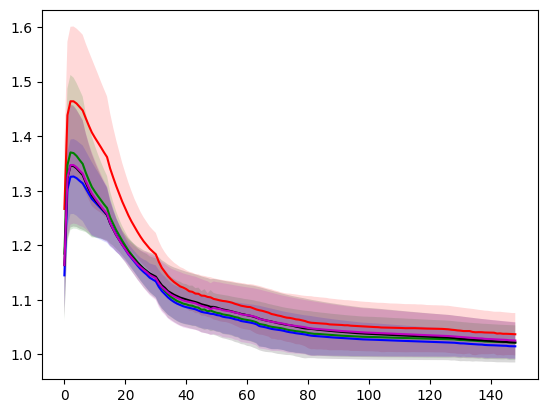

In [11]:
rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'k', 'm'])
for k in range(5):
    plt.fill_between(np.arange(mean_normalized_costs[:, 0].size), mean_normalized_costs[:, k]-std_normalized_costs[:, k], mean_normalized_costs[:, k]+std_normalized_costs[:, k], alpha=0.15)
    plt.plot(mean_normalized_costs[:, k])
plt.show()

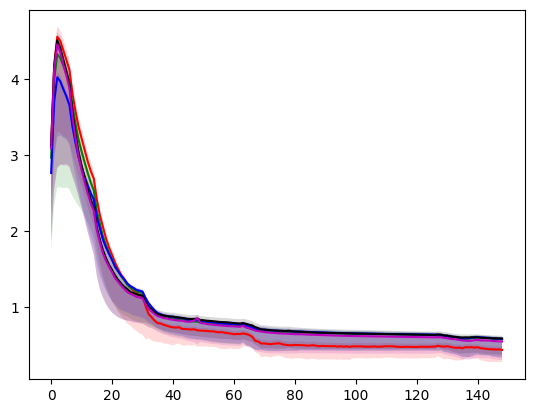

In [23]:
rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'k', 'm'])
for k in range(5):
    plt.fill_between(np.arange(mean_normalized_csats[:, 0].size), mean_normalized_csats[:, k]-std_normalized_csats[:, k], mean_normalized_csats[:, k]+std_normalized_costs[:, k], alpha=0.15)
    plt.plot(mean_normalized_csats[:, k])
plt.show()

In [48]:
mean_costs.shape, mean_osqp_costs.shape

((149, 5), (5,))

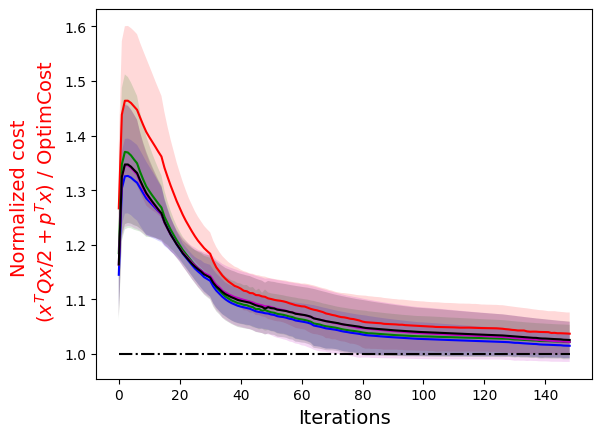

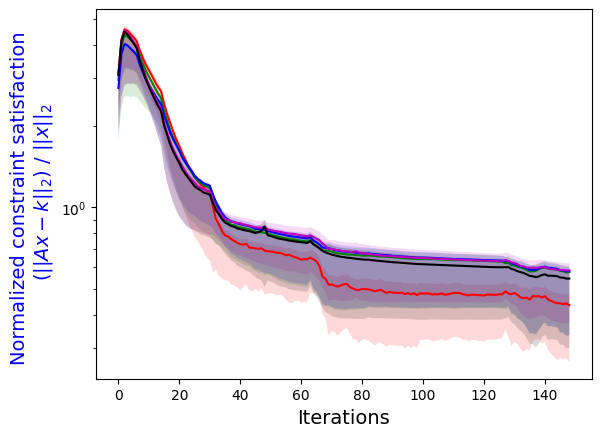

In [35]:
# cmap = plt.cm.Set1
# rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 5)))
# normalized_cond_num_q = np.interp(condition_numbers_q, (condition_numbers_q.min(), condition_numbers_q.max()), (0, 1))
# normalized_cond_num_a = np.interp(condition_numbers_a, (condition_numbers_a.min(), condition_numbers_a.max()), (0, 1))
rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'm', 'k'])

# rcParams['axes.prop_cycle'] = cycler(color=cmap(normalized_cond_num_q))
fig, ax = plt.subplots()
for k in range(5):
    plt.fill_between(np.arange(mean_normalized_costs[:, 0].size), 
                     mean_normalized_costs[:, k] - std_normalized_costs[:, k], 
                     mean_normalized_costs[:, k] + std_normalized_costs[:, k], 
                     alpha=0.15)
plt.plot(mean_normalized_costs)
# ax.plot(mean_costs/mean_osqp_costs)
ax.plot(np.ones_like(normalized_costs[:, 0]), '-.k')
ax.set_ylabel("Normalized cost \n ($x^T Q x/2 + p^T x$) / OptimCost",color="red",fontsize=14)
ax.set_xlabel("Iterations",fontsize=14)
# ax.set_ylim([0.95, 1.05])
# ax.set_xlim([1001, 1200])

# rcParams['axes.prop_cycle'] = cycler(color=cmap(normalized_cond_num_a))
fig2, ax2 = plt.subplots()
ax2.set_yscale('log')
# ax2.plot(normalized_constraint_sats)
for k in range(5):
    plt.fill_between(np.arange(mean_normalized_csats[:, 0].size), 
                     mean_normalized_csats[:, k] - std_normalized_csats[:, k], 
                     mean_normalized_csats[:, k] + std_normalized_costs[:, k], 
                     alpha=0.15)
plt.plot(mean_normalized_csats)
ax2.set_ylabel("Normalized constraint satisfaction \n ($||Ax-k||_2$) / $||x||_2$",color="blue",fontsize=14)
ax2.set_xlabel("Iterations",fontsize=14)
plt.show()

In [26]:
condition_numbers_q, condition_numbers_a

(array([13.057175  , 13.06875296, 13.00042249, 14.46940888, 16.89580274,
        53.30882068, 16.09808769, 14.88387096, 16.83022024, 12.00551582]),
 array([91.82769739, 92.15501323, 91.82769732, 68.01261723, 80.68751316,
        83.9323787 , 75.58301084, 63.05004809, 73.21365072, 70.52649428]))